<a href="https://colab.research.google.com/github/pratim808/smol-course/blob/main/6_synthetic_datasets%20/notebooks/preference_dpo_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate a dataset for preference alignment

This notebook will guide you through the process of generating a dataset for preference alignment. We'll use the `distilabel` package to generate a dataset for preference alignment.

So let's dig in to some preference alignment datasets.

<div style='background-color: lightblue; padding: 10px; border-radius: 5px; margin-bottom: 20px; color:black'>
    <h2 style='margin: 0;color:blue'>Exercise: Generate a dataset for preference alignment</h2>
    <p>Now that you've seen how to generate a dataset for preference alignment, try generating a dataset for preference alignment.</p>
    <p><b>Difficulty Levels</b></p>
    <p>🐢 Generate a dataset for preference alignment</p>
    <p>🐕 Generate a dataset for preference alignment with response evolution</p>
    <p>🦁 Generate a dataset for preference alignment with response evolution and model pooling</p>
</div>

## Install dependencies

Instead of transformers, you can also install `vllm` or `hf-inference-endpoints`.

##  Generate a dataset for preference alignment

In [1]:
!pip install "distilabel[hf-transformers,outlines,instructor]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.0/511.0 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.7/912.7 kB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Start synthesizing

As we've seen in the previous notebook, we can create a distilabel pipeline for preference dataset generation. The bare minimum pipline is already provided. You can continue work on this pipeline to generate a large dataset for preference alignment. Swap out models, model providers and generation arguments to see how they affect the quality of the dataset. Experiment small, scale up later.

Check out the [distilabel components gallery](https://distilabel.argilla.io/latest/components-gallery/) for information about the processing classes and how to use them.

An example of loading data from the Hub instead of dictionaries is provided below.

```python
from datasets import load_dataset

with Pipeline(...) as pipeline:
    ...

if __name__ == "__main__:
    dataset = load_dataset("my-dataset", split="train")
    distiset = pipeline.run(dataset=dataset)
```

Don't forget to push your dataset to the Hub after running the pipeline!

In [2]:
from distilabel.llms import TransformersLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import GroupColumns, LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration

with Pipeline() as pipeline:
    data = LoadDataFromDicts(data=[{"instruction": "What is synthetic data?"}])
    llm_a = TransformersLLM(model="HuggingFaceTB/SmolLM2-1.7B-Instruct")
    gen_a = TextGeneration(llm=llm_a)
    llm_b = TransformersLLM(model="Qwen/Qwen2.5-1.5B-Instruct")
    gen_b = TextGeneration(llm=llm_b)
    group = GroupColumns(columns=["generation"])
    data >> [gen_a, gen_b] >> group

if __name__ == "__main__":
    distiset = pipeline.run()
    #distiset.push_to_hub("huggingface-smol-course-preference-tuning-dataset")

<ipython-input-2-aa05d5230029>:1: DeprecationWarning: Importing from 'distilabel.llms' is deprecated and will be removed in a version 1.7.0. Import from 'distilabel.models' instead.
  from distilabel.llms import TransformersLLM


[01/22/25 19:50:38] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=706816;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=787271;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/root/.cache/distilabel/pipelines/pipeline_load_data_from_dicts_0_text_g             
                             eneration_0_text_generation_1_group_columns_0/3e803650c76fd2bf3ca599624be             
                             c16f2135a7401/executions/74a0299eb48ad0258727d61095bc0f45c7deacc8/data/st             
                             eps_outputs'                                                                          

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=666701;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=786818;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'load_data_from_dicts_0'                                                      
                                - 🔄 'text_generation_0'                                                           
                                - 🔄 'text_generation_1'                                                           
                                - 🔄 'group_columns_0'                                                             

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=155550;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=327745;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1382\1382]8;;\
                             load...                                                                               

[01/22/25 19:50:41] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 2/4                 ]8;id=103847;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=825302;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'load_data_from_dicts_0' replicas: 1/1                                             
                              * 'text_generation_0' replicas: 0/1                                                  
                              * 'text_generation_1' replicas: 0/1                                                  
                              * 'group_columns_0' replicas: 1/1                                                    

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/792 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.42G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Device set to use cuda:0


generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

Device set to use cuda:0


[01/22/25 19:52:53] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 3/4                 ]8;id=476542;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=275936;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'load_data_from_dicts_0' replicas: 1/1                                             
                              * 'text_generation_0' replicas: 0/1                                                  
                              * 'text_generation_1' replicas: 1/1                                                  
                              * 'group_columns_0' replicas: 1/1                                                    

[01/22/25 19:53:03] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 4/4                 ]8;id=364376;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=279538;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'load_data_from_dicts_0' replicas: 1/1                                             
                              * 'text_generation_0' replicas: 1/1                                                  
                              * 'text_generation_1' replicas: 1/1                                                  
                              * 'group_columns_0' replicas: 1/1                                                    

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=322494;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=843461;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1422\1422]8;;\

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🚰 Starting yielding    ]8;id=407441;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=962491;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#179\179]8;;\
                             batches from generator step 'load_data_from_dicts_0'. Offset: 0                       

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 📨 Step                 ]8;id=775965;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=590475;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             'load_data_from_dicts_0' sending batch 0 to output queue                              

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🏁 Finished running     ]8;id=862027;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=796354;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             step 'load_data_from_dicts_0' (replica ID: 0)                                         

                    INFO     ['distilabel.step.text_generation_0'] 📦 Processing batch 0 in     ]8;id=618813;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=454080;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#229\229]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

                    INFO     ['distilabel.step.text_generation_1'] 📦 Processing batch 0 in     ]8;id=958384;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=759668;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#229\229]8;;\
                             'text_generation_1' (replica ID: 0)                                                   

[01/22/25 19:53:14] INFO     ['distilabel.step.text_generation_0'] 📨 Step 'text_generation_0'  ]8;id=320989;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=25588;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_0'] 🏁 Finished running step     ]8;id=967074;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=706597;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

[01/22/25 19:53:16] INFO     ['distilabel.step.text_generation_1'] 📨 Step 'text_generation_1'  ]8;id=816237;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=650995;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_1'] 🏁 Finished running step     ]8;id=530792;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=68737;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_1' (replica ID: 0)                                                   

                    INFO     ['distilabel.step.group_columns_0'] 📦 Processing batch 0 in       ]8;id=530085;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=422885;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#229\229]8;;\
                             'group_columns_0' (replica ID: 0)                                                     

                    INFO     ['distilabel.step.group_columns_0'] 📨 Step 'group_columns_0'      ]8;id=6779;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=979886;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.group_columns_0'] 🏁 Finished running step       ]8;id=816029;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=384972;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'group_columns_0' (replica ID: 0)                                                     

Generating train split: 0 examples [00:00, ? examples/s]

In [3]:
distiset

Distiset({
    default: DatasetDict({
        train: Dataset({
            features: ['instruction', 'grouped_generation', 'model_name', 'distilabel_metadata'],
            num_rows: 1
        })
    })
})

In [4]:
distiset['default']['train']['instruction'][0]

'What is synthetic data?'

In [20]:
distiset['default']['train']['grouped_generation'][0][0]

'y'

In [7]:
distiset['default']['train']['model_name']

['Qwen/Qwen2.5-1.5B-Instruct']

In [8]:
distiset['default']['train']['distilabel_metadata'][0]

{'raw_input_text_generation_0': [{'content': 'What is synthetic data?',
   'role': 'user'}],
 'raw_input_text_generation_1': [{'content': 'What is synthetic data?',
   'role': 'user'}],
 'raw_output_text_generation_0': "Synthetic data refers to artificially generated data that mimics real-world data. It's created using algorithms and statistical models to mimic the characteristics of real data, but it doesn't actually come from any real-world source. Synthetic data can be used in various fields such as machine learning, data science, and artificial intelligence. It's often used when there isn't enough real-world data available or when you want to create test data for training purposes without affecting actual users or systems.",
 'raw_output_text_generation_1': 'Synthetic data refers to data that has been generated artificially rather than being collected from real-world sources. It can be used in various applications where privacy concerns or the need for large amounts of data exist.\

## Generate a preference alignment dataset with response evolution

### EvolQuality

In [13]:
completion = distiset['default']['train']['grouped_generation']
result = " ".join(completion[0])
print(result)
print(type(result))

Synthetic data refers to artificially generated data that mimics real-world data. It's created using algorithms and statistical models to mimic the characteristics of real data, but it doesn't actually come from any real-world source. Synthetic data can be used in various fields such as machine learning, data science, and artificial intelligence. It's often used when there isn't enough real-world data available or when you want to create test data for training purposes without affecting actual users or systems. Synthetic data refers to data that has been generated artificially rather than being collected from real-world sources. It can be used in various applications where privacy concerns or the need for large amounts of data exist.

Here are some key points about synthetic data:

1. Generation: Synthetic data is typically created using algorithms and machine learning techniques to simulate real-world data patterns.

2. Privacy: Unlike real-world data, synthetic data does not contain 

In [15]:
# Access the first string in the list of lists
first_string = completion[0][0]
print(first_string)
print(type(first_string))


Synthetic data refers to artificially generated data that mimics real-world data. It's created using algorithms and statistical models to mimic the characteristics of real data, but it doesn't actually come from any real-world source. Synthetic data can be used in various fields such as machine learning, data science, and artificial intelligence. It's often used when there isn't enough real-world data available or when you want to create test data for training purposes without affecting actual users or systems.
<class 'str'>


In [16]:
# Access the second string in the list of lists
second_string = completion[0][1]
print(second_string)
print(type(second_string))

Synthetic data refers to data that has been generated artificially rather than being collected from real-world sources. It can be used in various applications where privacy concerns or the need for large amounts of data exist.

Here are some key points about synthetic data:

1. Generation: Synthetic data is typically created using algorithms and machine learning techniques to simulate real-world data patterns.

2. Privacy: Unlike real-world data, synthetic data does not contain personally identifiable information (PII), making it suitable for use in scenarios requiring privacy protection.

3. Scalability: Synthetic data can be easily scaled up or down as needed without affecting its quality or accuracy.

4.
<class 'str'>


In [22]:
from distilabel.llms import TransformersLLM
from distilabel.steps.tasks import EvolQuality

llm = TransformersLLM(model="HuggingFaceTB/SmolLM2-1.7B-Instruct")
evol_quality = EvolQuality(llm=llm, num_evolutions=1)
evol_quality.load()

instruction = distiset['default']['train']['instruction'][0] #"What is synthetic data?"
#completion = distiset['default']['train']['grouped_generation'] #"Synthetic data is artificially generated data that mimics real-world usage."

response = next(evol_quality.process([{
    "instruction": instruction,
    "response": result
}]))
# The process of generating synthetic data through manual prompting involves creating artificial data sets that mimic real-world usage patterns.

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.11/logging/handlers.py", line 1492, in emit
    self.enqueue(self.prepare(record))
  File "/usr/lib/python3.11/logging/handlers.py", line 1450, in enqueue
    self.queue.put_nowait(record)
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 138, in put_nowait
    return self.put(obj, False)
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 88, in put
    raise ValueError(f"Queue {self!r} is closed")
ValueError: Queue <multiprocessing.queues.Queue object at 0x7eace3c77710> is closed
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  

In [23]:
response

[{'instruction': 'What is synthetic data?',
  'response': "Synthetic data refers to artificially generated data that mimics real-world data. It's created using algorithms and statistical models to mimic the characteristics of real data, but it doesn't actually come from any real-world source. Synthetic data can be used in various fields such as machine learning, data science, and artificial intelligence. It's often used when there isn't enough real-world data available or when you want to create test data for training purposes without affecting actual users or systems. Synthetic data refers to data that has been generated artificially rather than being collected from real-world sources. It can be used in various applications where privacy concerns or the need for large amounts of data exist.\n\nHere are some key points about synthetic data:\n\n1. Generation: Synthetic data is typically created using algorithms and machine learning techniques to simulate real-world data patterns.\n\n2. 

In [27]:
# Iterate through the list of dictionaries
for item in response:
    # Print the instruction
    print("Instruction:", item['instruction'])
    # Print the response
    print("Response:", item['response'])
    # Print the evolved response
    print("Evolved Response:", item['evolved_response'])
    #print("-" * 20)  # Separator for clarity

Instruction: What is synthetic data?
Response: Synthetic data refers to artificially generated data that mimics real-world data. It's created using algorithms and statistical models to mimic the characteristics of real data, but it doesn't actually come from any real-world source. Synthetic data can be used in various fields such as machine learning, data science, and artificial intelligence. It's often used when there isn't enough real-world data available or when you want to create test data for training purposes without affecting actual users or systems. Synthetic data refers to data that has been generated artificially rather than being collected from real-world sources. It can be used in various applications where privacy concerns or the need for large amounts of data exist.

Here are some key points about synthetic data:

1. Generation: Synthetic data is typically created using algorithms and machine learning techniques to simulate real-world data patterns.

2. Privacy: Unlike re

In [25]:
print(type(response))

<class 'list'>


## 🦁 Generate a preference alignment dataset with response evolution and critiques

In [ ]:
from distilabel.llms import TransformersLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import GroupColumns, LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration

with Pipeline() as pipeline:
    data = LoadDataFromDicts(data=[{"instruction": "What is synthetic data?"}])
    llm_a = TransformersLLM(model="HuggingFaceTB/SmolLM2-1.7B-Instruct")
    gen_a = TextGeneration(llm=llm_a)
    llm_b = TransformersLLM(model="Qwen/Qwen2.5-1.5B-Instruct")
    gen_b = TextGeneration(llm=llm_b)
    group = GroupColumns(columns=["generation"])
    data >> [gen_a, gen_b] >> group

if __name__ == "__main__":
    distiset = pipeline.run()

In [31]:
import multiprocessing as mp
mp.set_start_method('spawn', force=True)

[01/22/25 20:19:45] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=804284;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=59250;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/root/.cache/distilabel/pipelines/pipeline_load_data_from_dicts_0_text_g             
                             eneration_0_text_generation_1/0ef77485d0d95c326dcb5d73da83d52c113ab8a9/ex             
                             ecutions/bec7b963d11e2057d503cd388772d4e876962414/data/steps_outputs'                 

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=193257;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=50865;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'load_data_from_dicts_0'                                                      
                                - 🔄 'text_generation_0'                                                           
                                - 🔄 'text_generation_1'                                                           

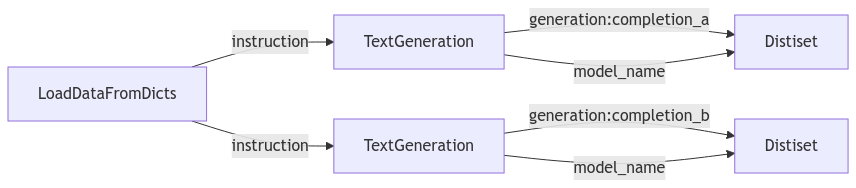

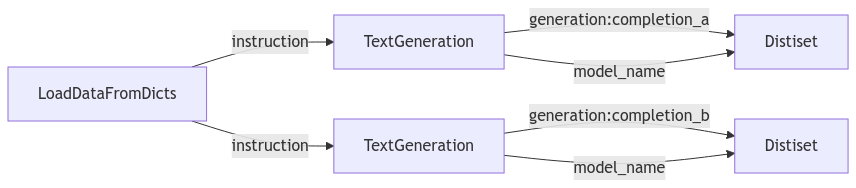

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 0>:16                                                                             │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │    completion = [                                                                            │ │
│ │                 │   [                                                                        │ │
│ │                 │   │   'Synthetic data refers to artificially generated data that mimics    │ │
│ │                 real-world data'+436,                                                        │ │
│ │                 │   │   'Synthetic data refers to data that has been generated artificially  │ │
│ │                 rather than b'+636                                                           │ │
│ │                 │   ]                                                                        │ │
│ │                 ]                                                                            │ │
│ │          data = LoadDataFromDicts(                                                           │ │
│ │                 │   exclude_from_signature={                                                 │ │
│ │                 │   │   'gpu_memory_utilization',                                            │ │
│ │                 │   │   'resources',                                                         │ │
│ │                 │   │   'llm_jobs_ids',                                                      │ │
│ │                 │   │   'type_info',                                                         │ │
│ │                 │   │   'input_batch_size',                                                  │ │
│ │                 │   │   'disable_cuda_device_placement',                                     │ │
│ │                 │   │   'llm_offline_batch_generation_block_until_done',                     │ │
│ │                 │   │   'exclude_from_signature'                                             │ │
│ │                 │   },                                                                       │ │
│ │                 │   name='load_data_from_dicts_0',                                           │ │
│ │                 │   resources=StepResources(                                                 │ │
│ │                 │   │   replicas=1,                                                          │ │
│ │                 │   │   cpus=None,                                                           │ │
│ │                 │   │   gpus=None,                                                           │ │
│ │                 │   │   memory=None,                                                         │ │
│ │                 │   │   resources=None                                                       │ │
│ │                 │   ),                                                                       │ │
│ │                 │   input_mappings={},                                                       │ │
│ │                 │   output_mappings={},                                                      │ │
│ │                 │   use_cache=True,                                                          │ │
│ │                 │   batch_size=50,                                                           │ │
│ │                 │   data=[{'instruction': 'What is synthetic data?'}]                        │ │
│ │                 )                                                                            │ │
│ │      distiset = Distiset({                                                                   │ │
│ │                 │   default: DatasetDict({                                                   │ │
│ │                 │   │   train: Dataset({                                                     │ │
│ │                 │   │   │   features: ['instruction', 'gr

In [32]:
from distilabel.llms import TransformersLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration

with Pipeline() as pipeline:
    data = LoadDataFromDicts(data=[{"instruction": "What is synthetic data?"}])
    llm_a = TransformersLLM(model="HuggingFaceTB/SmolLM2-1.7B-Instruct")
    gen_a = TextGeneration(llm=llm_a, output_mappings={"generation": "completion_a "}) # save the output in a column called chosen.
    llm_b = TransformersLLM(model="Qwen/Qwen2.5-1.5B-Instruct")
    gen_b = TextGeneration(llm=llm_b, output_mappings={"generation": "completion_b"})  # save the output in a column called rejected.
    data >> [gen_a, gen_b] # removed the grouping step

if __name__ == "__main__":
    mp.set_start_method('spawn', force=True)  # Set before running distilabel
    distiset = pipeline.run()
    print(distiset) # print the final dataset

In [34]:
from distilabel.llms import TransformersLLM
from distilabel.steps.tasks import UltraFeedback

llm = TransformersLLM(model="HuggingFaceTB/SmolLM2-1.7B-Instruct")
ultrafeedback = UltraFeedback(llm=llm)
ultrafeedback.load()

instruction = "What is synthetic data?"
completion_a = first_string #"Synthetic data is artificially generated data that mimics real-world usage."
completion_b = second_string #"Synthetic data refers to data that has been generated artificially."

ultrafeedback_response = next(ultrafeedback.process([{
    "instruction": instruction,
    "generations": [completion_a, completion_b]
}]))
# [
#     {
#         'ratings': [4, 5],
#         'rationales': ['could have been more specific', 'good definition'],
#     }
# ]

[01/22/25 20:21:23] WARNING  ['distilabel.step.None'] Step 'None' hasn't received a pipeline, and it    ]8;id=246839;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/base.py\base.py]8;;\:]8;id=435078;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/base.py#222\222]8;;\
                             hasn't been created within a `Pipeline` context. Please, use `with                    
                             Pipeline() as pipeline:` and create the step within the context.                      

Device set to use cuda:0


In [41]:
completion_a
completion_b

'Synthetic data refers to data that has been generated artificially rather than being collected from real-world sources. It can be used in various applications where privacy concerns or the need for large amounts of data exist.\n\nHere are some key points about synthetic data:\n\n1. Generation: Synthetic data is typically created using algorithms and machine learning techniques to simulate real-world data patterns.\n\n2. Privacy: Unlike real-world data, synthetic data does not contain personally identifiable information (PII), making it suitable for use in scenarios requiring privacy protection.\n\n3. Scalability: Synthetic data can be easily scaled up or down as needed without affecting its quality or accuracy.\n\n4.'

In [35]:
ultrafeedback_response

[{'instruction': 'What is synthetic data?',
  'generations': ["Synthetic data refers to artificially generated data that mimics real-world data. It's created using algorithms and statistical models to mimic the characteristics of real data, but it doesn't actually come from any real-world source. Synthetic data can be used in various fields such as machine learning, data science, and artificial intelligence. It's often used when there isn't enough real-world data available or when you want to create test data for training purposes without affecting actual users or systems.",
   'Synthetic data refers to data that has been generated artificially rather than being collected from real-world sources. It can be used in various applications where privacy concerns or the need for large amounts of data exist.\n\nHere are some key points about synthetic data:\n\n1. Generation: Synthetic data is typically created using algorithms and machine learning techniques to simulate real-world data patter

In [38]:
# Iterate through the list of dictionaries
for item in ultrafeedback_response:
    # Print the instruction
    print("Instruction:", item['instruction'])
    # Print the response
    print("Generations:", item['generations'])
    # Print the evolved response
    print("Ratings:", item['ratings'])
    print("Rationales" ,item['rationales'])
    #print("Rationales" ,item['rationales'])
    print("Distilabel_metadata",item['distilabel_metadata'])
    #print("-" * 20)  # Separator for clarity

Instruction: What is synthetic data?
Generations: ["Synthetic data refers to artificially generated data that mimics real-world data. It's created using algorithms and statistical models to mimic the characteristics of real data, but it doesn't actually come from any real-world source. Synthetic data can be used in various fields such as machine learning, data science, and artificial intelligence. It's often used when there isn't enough real-world data available or when you want to create test data for training purposes without affecting actual users or systems.", 'Synthetic data refers to data that has been generated artificially rather than being collected from real-world sources. It can be used in various applications where privacy concerns or the need for large amounts of data exist.\n\nHere are some key points about synthetic data:\n\n1. Generation: Synthetic data is typically created using algorithms and machine learning techniques to simulate real-world data patterns.\n\n2. Priv

In [39]:
 # Print the response
print("Generations:", item['generations'])

Generations: ["Synthetic data refers to artificially generated data that mimics real-world data. It's created using algorithms and statistical models to mimic the characteristics of real data, but it doesn't actually come from any real-world source. Synthetic data can be used in various fields such as machine learning, data science, and artificial intelligence. It's often used when there isn't enough real-world data available or when you want to create test data for training purposes without affecting actual users or systems.", 'Synthetic data refers to data that has been generated artificially rather than being collected from real-world sources. It can be used in various applications where privacy concerns or the need for large amounts of data exist.\n\nHere are some key points about synthetic data:\n\n1. Generation: Synthetic data is typically created using algorithms and machine learning techniques to simulate real-world data patterns.\n\n2. Privacy: Unlike real-world data, syntheti